## Spam Text Detector

### What is the function and usability of this model?

To train the model in understanding and recognizing the pattern of a spam which is presence in the text

*Import all required module*

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns





In [88]:
# Read the data source using pandas

data = pd.read_csv('Database/SPAM text message 20170820 - Data.csv')

# Print out the first 5 row of the data

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [89]:
# Grouping the data 

data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

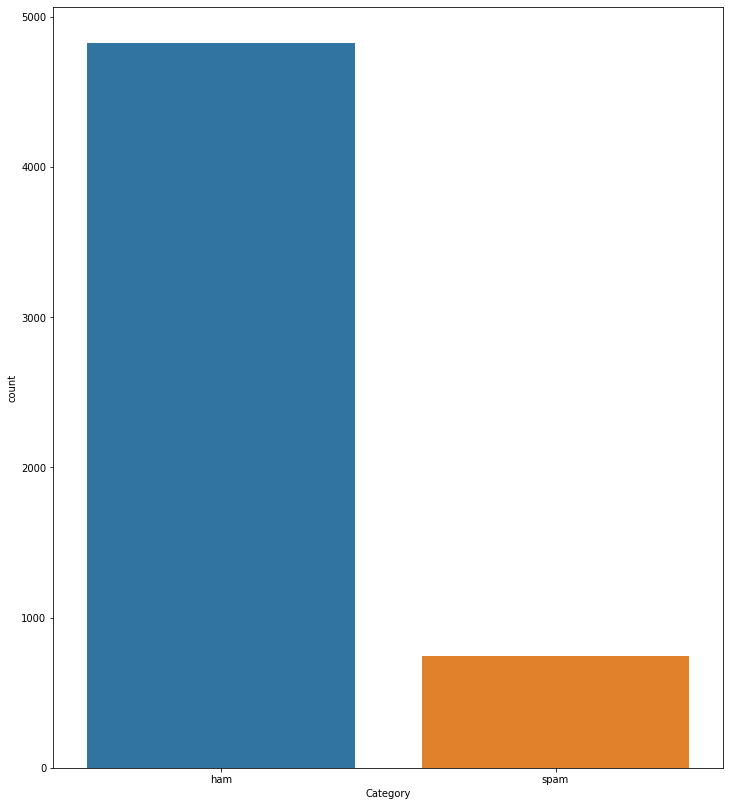

In [90]:
# Print data in a diagram figure ffor visualization

plt.figure(figsize=(12,14))
sns.countplot(data['Category'])

In [91]:
ham_msg = data[data.Category == 'ham']
print(ham_msg)
spam_msg = data[data.Category == 'spam']
print(spam_msg)
print(ham_msg.shape, spam_msg.shape)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
6         ham  Even my brother is not like to speak with me. ...
...       ...                                                ...
5565      ham                                       Huh y lei...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[4825 rows x 2 columns]
     Category                                            Message
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
5        spam  FreeMsg Hey there darling it's been 3 week's n...


In [92]:
# extracting the data randomly
ham_msg=ham_msg.sample(n=len(spam_msg), random_state=42)
print(ham_msg)

     Category                                            Message
3714      ham  If i not meeting ü all rite then i'll go home ...
1311      ham  I.ll always be there, even if its just in spir...
548       ham                   Sorry that took so long, omw now
1324      ham  I thk 50 shd be ok he said plus minus 10.. Did...
3184      ham  Dunno i juz askin cos i got a card got 20% off...
...       ...                                                ...
4992      ham  We made it! Eta at taunton is 12:30 as planned...
3117      ham                Uncle Abbey! Happy New Year. Abiola
4975      ham  Aiyo u so poor thing... Then u dun wan 2 eat? ...
3505      ham                          Will you be here for food
1983      ham  Hey i will be late... i'm at amk. Need to drin...

[747 rows x 2 columns]


In [93]:
print(ham_msg.shape, spam_msg.shape)

(747, 2) (747, 2)


C:\Users\frent\AppData\Local\Temp\ipykernel_54960\700729076.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = ham_msg.append(spam_msg).reset_index(drop=True)
c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Types of messages')

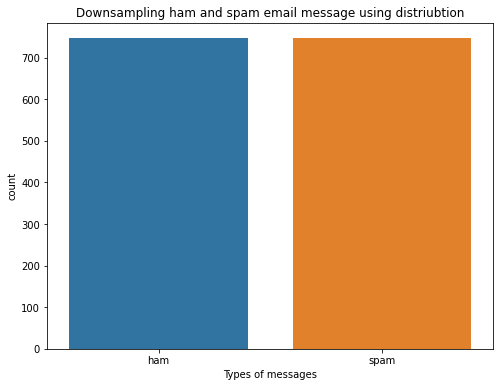

In [94]:
balanced_data = ham_msg.append(spam_msg).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.Category)
plt.title('Downsampling ham and spam email message using distriubtion')
plt.xlabel('Types of messages')


In [95]:
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [96]:
balanced_data['label'] = balanced_data['Category'].map({'ham':0, 'spam':1})

In [97]:
train_msg, test_msg, train_labels, test_labels = train_test_split(balanced_data['Message'], balanced_data['label'], test_size=0.2, random_state=434)

In [98]:
vocab_size = 500
oov_tok = '<OOV>'
max_len = 500

In [99]:
token = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [100]:
word_index = token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [101]:
padding_type = 'post'
truncate_type = 'post'
Training_seq = token.texts_to_sequences(train_msg)
Training_pad = pad_sequences(Training_seq, maxlen=50, padding=padding_type, truncating=truncate_type)


In [102]:
Testing_seq = token.texts_to_sequences(test_msg)
Testing_pad = pad_sequences(Testing_seq, maxlen=50, padding = padding_type, truncating=truncate_type)

In [103]:
# model keras

model = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size, 16, input_length=50), tf.keras.layers.GlobalAveragePooling1D(), tf.keras.layers.Dense(32, activation='relu'), tf.keras.layers.Dropout(0.3), tf.keras.layers.Dense(1, activation='sigmoid')])

In [104]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'], optimizer='adam')

In [105]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(Training_pad, train_labels, validation_data=(Testing_pad, test_labels), epochs=epoch, callbacks=[early_stop], verbose=2)

Epoch 1/30


C:\Users\frent\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 - 0s - loss: 0.6882 - accuracy: 0.7230 - val_loss: 0.6792 - val_accuracy: 0.8027 - 466ms/epoch - 12ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6670 - accuracy: 0.8285 - val_loss: 0.6431 - val_accuracy: 0.8495 - 54ms/epoch - 1ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6150 - accuracy: 0.8653 - val_loss: 0.5699 - val_accuracy: 0.8729 - 51ms/epoch - 1ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5281 - accuracy: 0.8778 - val_loss: 0.4677 - val_accuracy: 0.8896 - 54ms/epoch - 1ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4298 - accuracy: 0.8904 - val_loss: 0.3725 - val_accuracy: 0.8997 - 56ms/epoch - 1ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3471 - accuracy: 0.9021 - val_loss: 0.3029 - val_accuracy: 0.9030 - 58ms/epoch - 2ms/step
Epoch 7/30
38/38 - 0s - loss: 0.2799 - accuracy: 0.9155 - val_loss: 0.2491 - val_accuracy: 0.9264 - 68ms/epoch - 2ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2373 - accuracy: 0.9255 - val_loss: 0.2123 - val_accuracy: 0.9298 - 66ms/epoch - 2ms/step
Epoch 9/30
38/38 - 0s - loss: 0.2

In [106]:
time model.evaluate(Testing_pad, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9766
CPU times: total: 46.9 ms
Wall time: 50.2 ms


[0.07484632730484009, 0.9765886068344116]

Text(0.5, 0, 'epoch')

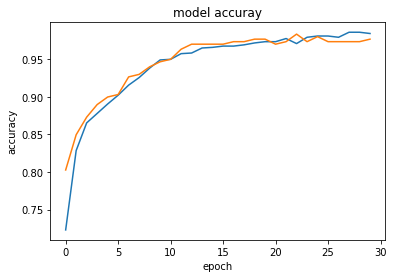

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuray')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [108]:
predict_msg1 = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [109]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 [==============================] - 0s 40ms/step


array([[0.71123785]], dtype=float32)